In [12]:
import numpy as np
import os

os.environ['CUDA_VISIBLE_DEVICES'] = '1'
os.environ['TF_FORCE_GPU_ALLOW_GROWTH'] = 'true'

# test

In [2]:
actions = ['좋다','예쁘다','너','나','지우기','오늘','고마워','항상','안경','책',
           '보다','먹다','자다','안녕']

os.environ['CUDA_VISIBLE_DEVICES'] = '1'
os.environ['TF_FORCE_GPU_ALLOW_GROWTH'] = 'true'


data_load = []
for act in actions:
    data_load.append(glob.glob(f'dataset/seq_{act}*.npy'))
np_load = []
for data in data_load:
    np_load.append(np.load(data[0]))

NameError: name 'glob' is not defined

# training 

In [13]:
import glob
import numpy as np

#부끄럽다, 모르다, 우리, 행복, 그리고, 처음, 아들, 무슨, 이름, 심심하다, 귀엽다, 색
#나, 너, 좋다, 책, 예쁘다, 오늘, 지우기 

actions = ['좋다','예쁘다','너','나','지우기','오늘','고마워','항상','안경','책',
           '보다','먹다','자다','안녕','커피','사랑','대회','내일','노래','숙제']

#actions = ['좋다','예쁘다','너','나','지우기','오늘','고마워','책','부끄럽다','모르다',
#           '우리', '행복', '그리고', '처음','아들', '무슨', '이름', '심심하다', '귀엽다']
#고마워, 
#안경, 자다, 안녕, 커피, 사랑, 대회, 내일, 노래, 숙제
os.environ['CUDA_VISIBLE_DEVICES'] = '1'
os.environ['TF_FORCE_GPU_ALLOW_GROWTH'] = 'true'


data_load = []
for act in actions:
    data_load.append(glob.glob(f'dataset/seq_{act}*.npy'))
np_load = []
for data in data_load:
    np_load.append(np.load(data[0]))

In [14]:
data = np.concatenate(np_load, axis=0)

data.shape

(16475, 30, 100)

In [15]:
x_data = data[:, :, :-1]
labels = data[:, 0, -1]

print(x_data.shape)
print(labels.shape)

(16475, 30, 99)
(16475,)


In [16]:
from tensorflow.keras.utils import to_categorical

y_data = to_categorical(labels, num_classes=len(actions))
y_data.shape

(16475, 20)

In [17]:
from sklearn.model_selection import train_test_split

x_data = x_data.astype(np.float32)
y_data = y_data.astype(np.float32)

x_train, x_val, y_train, y_val = train_test_split(x_data, y_data, test_size=0.2, random_state=2023)

print(x_train.shape, y_train.shape)
print(x_val.shape, y_val.shape)

(13180, 30, 99) (13180, 20)
(3295, 30, 99) (3295, 20)


In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Conv1D, MaxPooling1D
import tensorflow as tf

# model = Sequential([
#     LSTM(64, activation='relu', input_shape=x_train.shape[1:3]),
#     Dense(32, activation='relu'),
#     Dense(len(actions), activation='softmax')
# ])

model = Sequential([
    Conv1D(filters=32, kernel_size=5, padding='same', activation='relu', input_shape=x_train.shape[1:3]), 
    MaxPooling1D(pool_size=2),
    LSTM(64, activation='relu'),
    Dropout(0.2), 
    Dense(32, activation='relu'),
#     Dense(64, activation='relu'),
#     Dense(32, activation='relu'),
    Dense(len(actions), activation='softmax')
])


model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 30, 32)            15872     
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 15, 32)            0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 64)                24832     
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_3 (Dense)              (None, 20)                660       
Total params: 43,444
Trainable params: 43,444
Non-trainable params: 0
__________________________________________________

In [19]:
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau

history = model.fit(
    x_train,
    y_train,
    validation_data=(x_val, y_val),
    epochs=50,
    callbacks=[
        ModelCheckpoint('models/model.h5', monitor='val_acc', verbose=1, save_best_only=True, mode='auto'),
        ReduceLROnPlateau(monitor='val_acc', factor=0.5, patience=10, verbose=1, mode='auto')
    ]
)

Epoch 1/50
408/412 [============================>.] - ETA: 0s - loss: 2.3179 - acc: 0.5434
Epoch 00001: val_acc improved from -inf to 0.88498, saving model to models\model.h5
412/412 [==============================] - 3s 8ms/step - loss: 2.3020 - acc: 0.5456 - val_loss: 0.4047 - val_acc: 0.8850
Epoch 2/50
411/412 [============================>.] - ETA: 0s - loss: 0.4066 - acc: 0.8676
Epoch 00002: val_acc improved from 0.88498 to 0.94901, saving model to models\model.h5
412/412 [==============================] - 3s 7ms/step - loss: 0.4062 - acc: 0.8676 - val_loss: 0.1338 - val_acc: 0.9490
Epoch 3/50
409/412 [============================>.] - ETA: 0s - loss: 0.2046 - acc: 0.9324
Epoch 00003: val_acc improved from 0.94901 to 0.98240, saving model to models\model.h5
412/412 [==============================] - 3s 7ms/step - loss: 0.2036 - acc: 0.9328 - val_loss: 0.0684 - val_acc: 0.9824
Epoch 4/50
408/412 [============================>.] - ETA: 0s - loss: 0.1760 - acc: 0.9484
Epoch 00004: va

Epoch 31/50
408/412 [============================>.] - ETA: 0s - loss: 0.0098 - acc: 0.9973- ETA: 1s - loss:
Epoch 00031: val_acc did not improve from 0.99939
412/412 [==============================] - 3s 6ms/step - loss: 0.0097 - acc: 0.9973 - val_loss: 0.0026 - val_acc: 0.9988
Epoch 32/50
411/412 [============================>.] - ETA: 0s - loss: 0.0117 - acc: 0.9973
Epoch 00032: val_acc improved from 0.99939 to 1.00000, saving model to models\model.h5
412/412 [==============================] - 3s 6ms/step - loss: 0.0116 - acc: 0.9973 - val_loss: 4.2612e-04 - val_acc: 1.0000
Epoch 33/50
408/412 [============================>.] - ETA: 0s - loss: 0.0411 - acc: 0.9926
Epoch 00033: val_acc did not improve from 1.00000
412/412 [==============================] - 3s 6ms/step - loss: 0.0410 - acc: 0.9925 - val_loss: 0.0213 - val_acc: 0.9921
Epoch 34/50
407/412 [============================>.] - ETA: 0s - loss: 0.0072 - acc: 0.9981
Epoch 00034: val_acc did not improve from 1.00000
412/412 [==

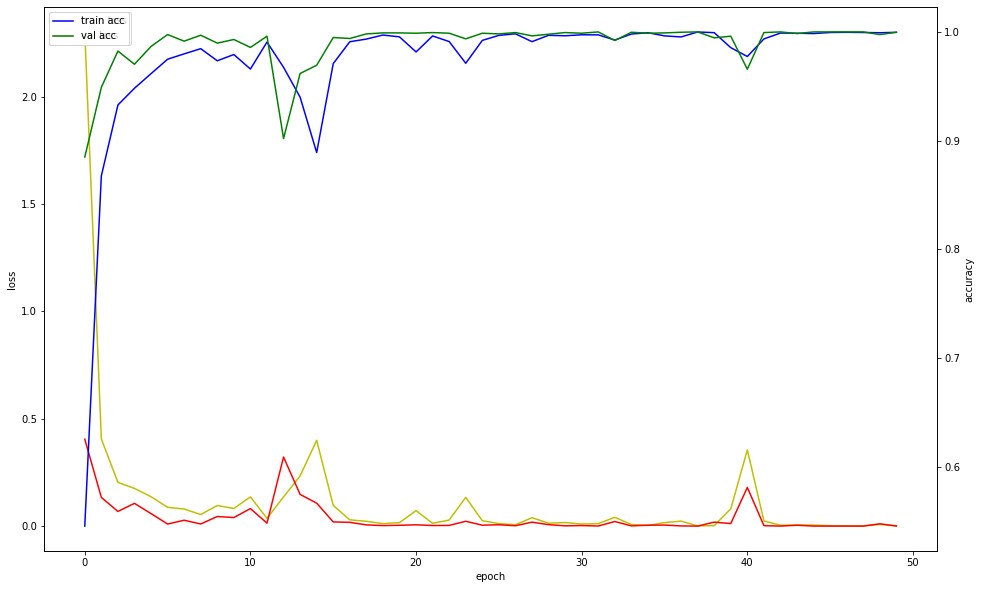

In [20]:
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots(figsize=(16, 10))
acc_ax = loss_ax.twinx()

loss_ax.plot(history.history['loss'], 'y', label='train loss')
loss_ax.plot(history.history['val_loss'], 'r', label='val loss')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
loss_ax.legend(loc='upper left')

acc_ax.plot(history.history['acc'], 'b', label='train acc')
acc_ax.plot(history.history['val_acc'], 'g', label='val acc')
acc_ax.set_ylabel('accuracy')
acc_ax.legend(loc='upper left')

plt.show()

In [21]:
from sklearn.metrics import multilabel_confusion_matrix
from tensorflow.keras.models import load_model

model = load_model('models/model.h5')

y_pred = model.predict(x_val)

multilabel_confusion_matrix(np.argmax(y_val, axis=1), np.argmax(y_pred, axis=1))

array([[[2937,    0],
        [   0,  358]],

       [[3117,    0],
        [   0,  178]],

       [[3101,    0],
        [   0,  194]],

       [[2975,    0],
        [   0,  320]],

       [[2956,    0],
        [   0,  339]],

       [[2850,    0],
        [   0,  445]],

       [[2839,    0],
        [   0,  456]],

       [[3001,    0],
        [   0,  294]],

       [[3028,    0],
        [   0,  267]],

       [[2851,    0],
        [   0,  444]]], dtype=int64)